In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [82]:
#Importing the dataset
df= pd.read_csv("Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


The target variable is fraud reported and this is a classification problem.

In [83]:
df.shape

(1000, 40)

The dataset has 1000 rows and 40 columns

In [84]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [85]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can see that there are no missing values in the columns except for _c39 which we can delete

In [86]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

We can see that incident_location and policy_number have 1000 unique values so we can get rid of these colmns as well.

In [87]:
df=df.drop("_c39",axis=1)

In [88]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

We can now see that there are no missing values, let us check for class imbalance for the target varible.

<AxesSubplot:title={'center':'Fraud count'}, xlabel='fraud_reported', ylabel='count'>

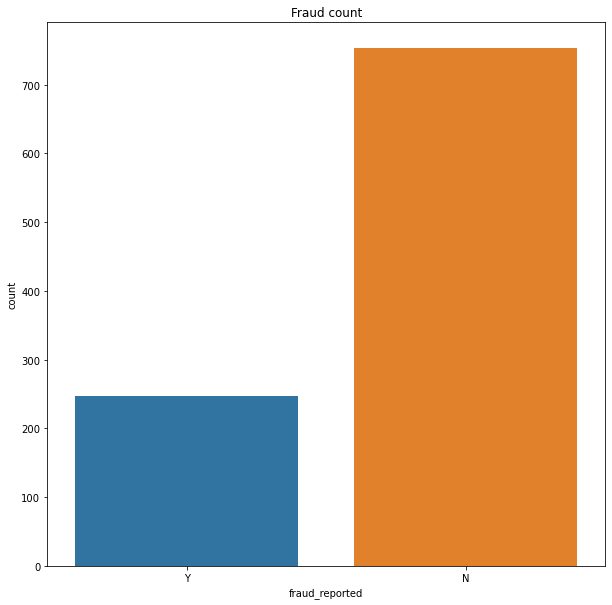

In [89]:
plt.figure(figsize=(10,10))
plt.title('Fraud count')
sn.countplot(df['fraud_reported'])

In [90]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

We can see that the target class is imbalanced.

<Figure size 432x288 with 0 Axes>

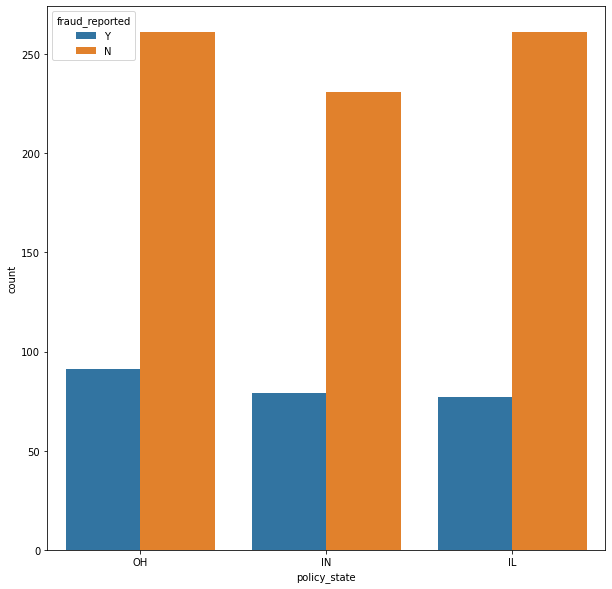

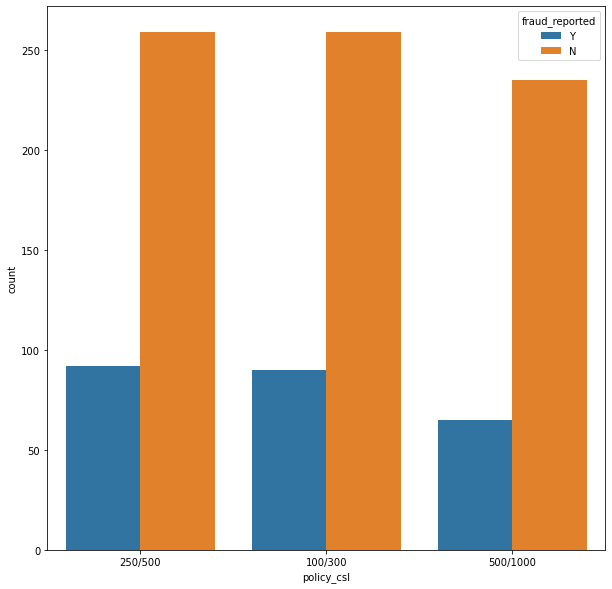

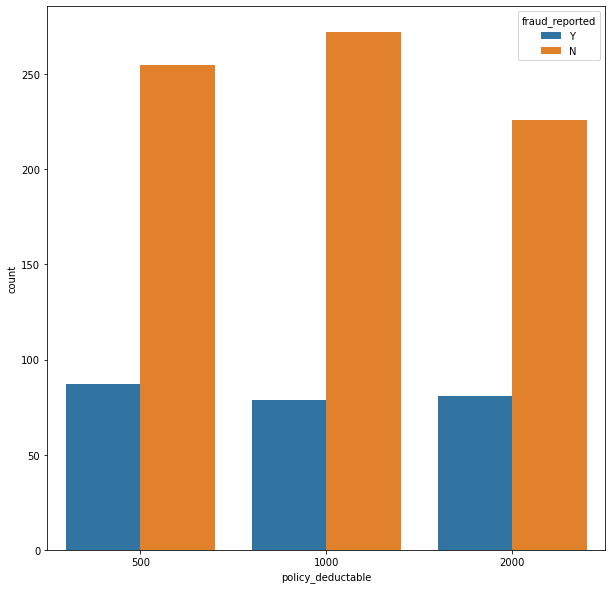

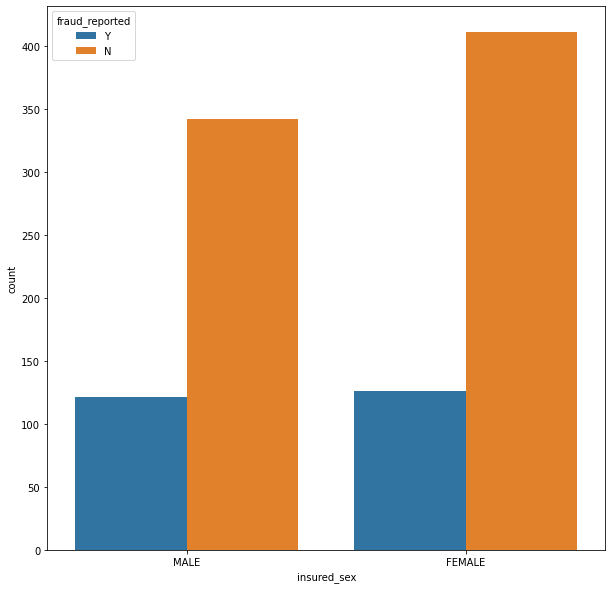

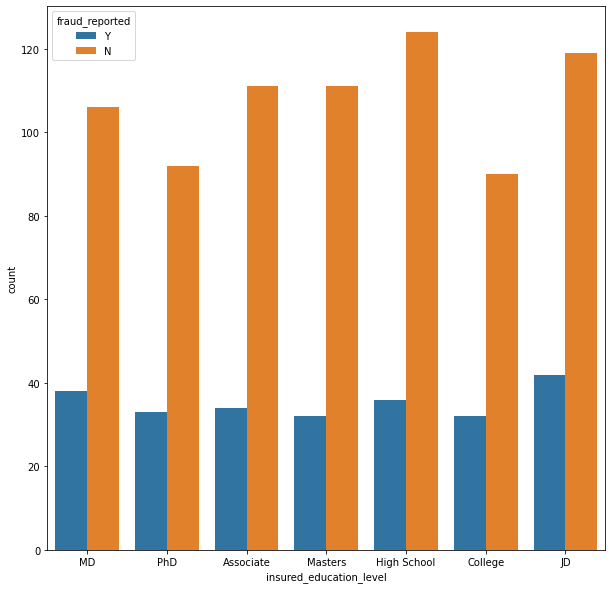

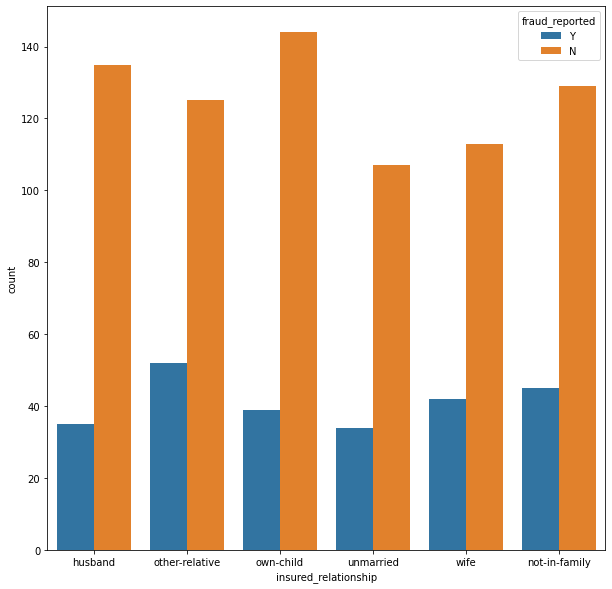

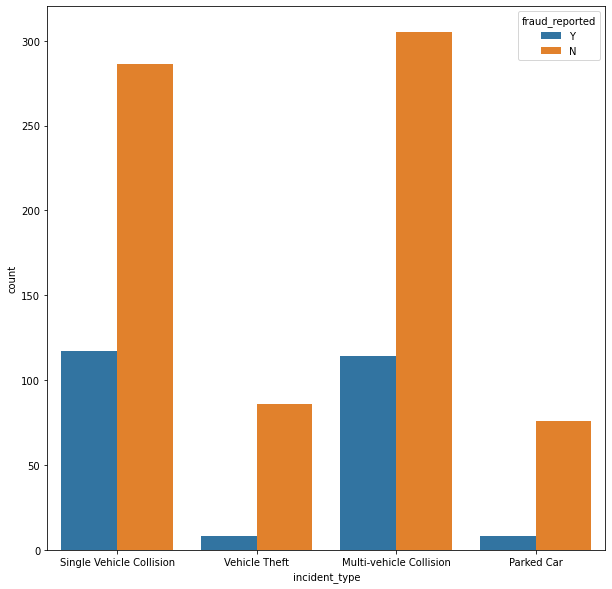

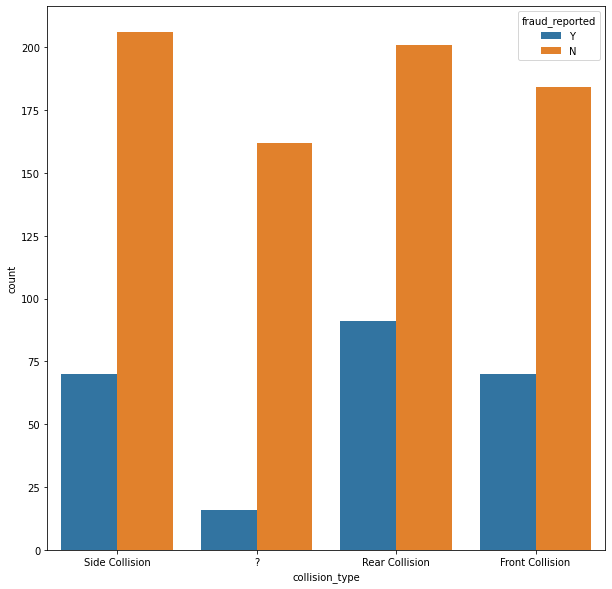

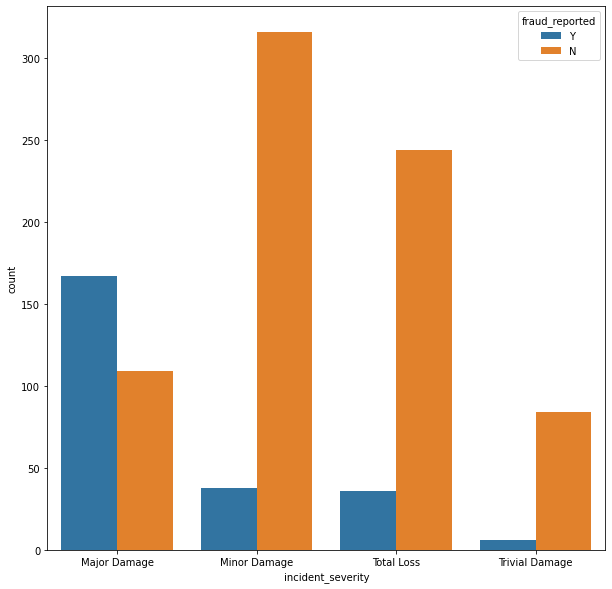

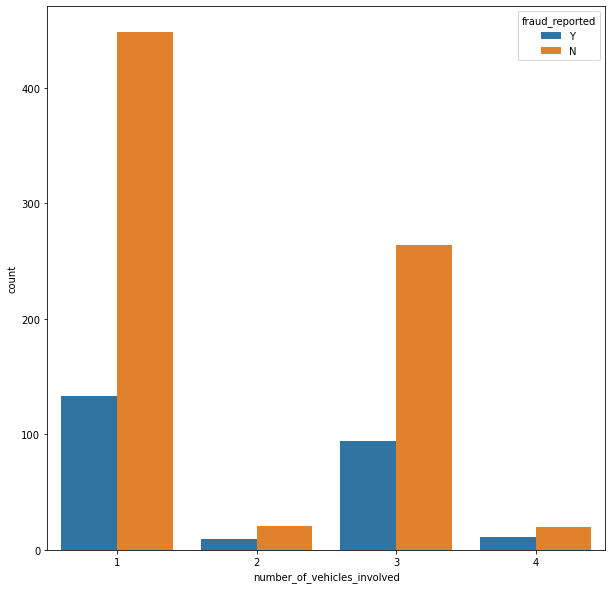

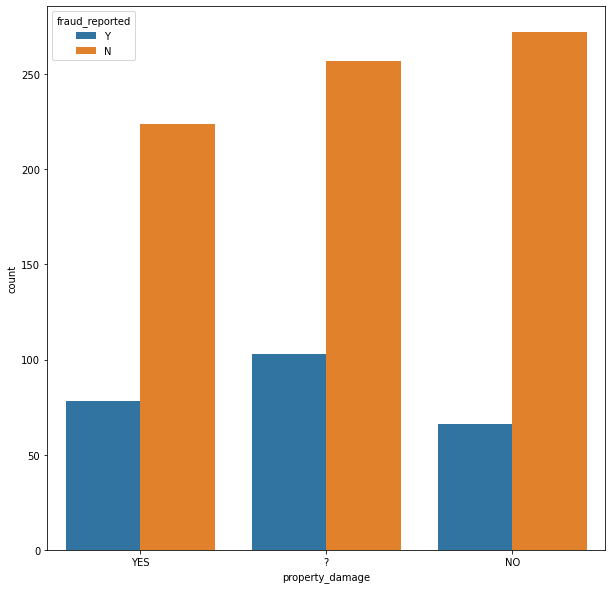

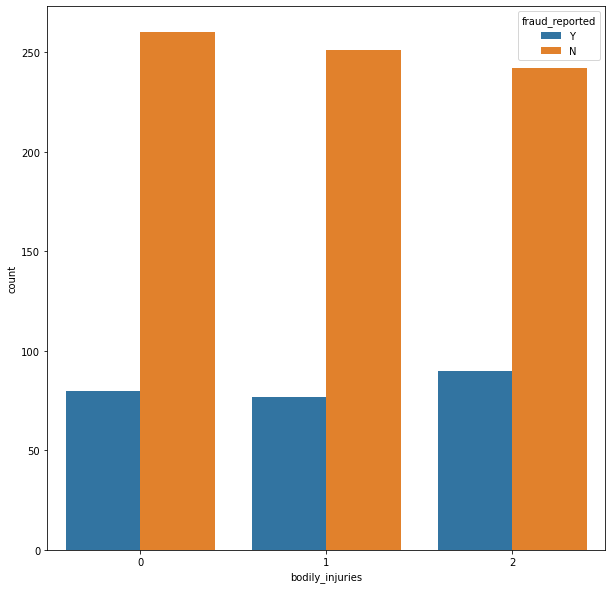

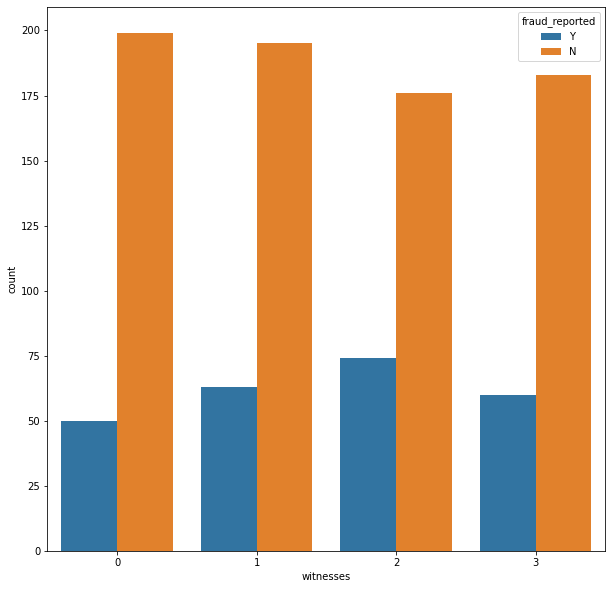

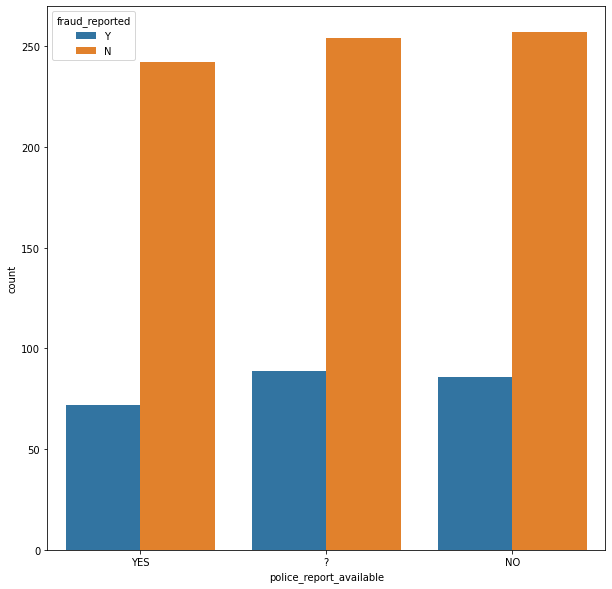

In [91]:
columns = ['policy_state','policy_csl','policy_deductable','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available']
for i,col in enumerate(columns):
    plt.figure(i)
    plt.figure(figsize=(10,10))
    sn.countplot(x=col, data=df, hue = 'fraud_reported')

From the above graphs, we can see that
1.Fraud is reprted mostly during single or multi vehicle collision rather than theft.
2.Fraud is reprted mostly as rear collision.
3.Fraud is reprted mostly during major damage than trivial damage.
4.Fraud is reprted mostly when there is only one vehicle involved.
5.Fraud is reprted mostly when with 2 or more witnesses.


<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

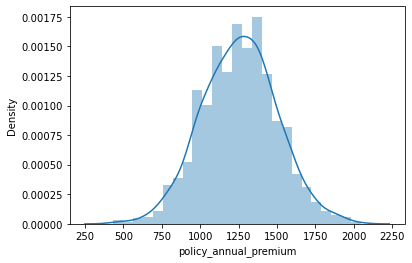

In [92]:
 
sn.distplot(df['policy_annual_premium'])

In [93]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [94]:
#Extracting day and month from Date
df['policy_bind_month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['policy_bind_day'] = pd.DatetimeIndex(df['policy_bind_date']).day
df['policy_bind_year'] = pd.DatetimeIndex(df['policy_bind_date']).year

In [95]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_day,policy_bind_year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,10,17,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,6,27,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


As we have extracted the day, month and year, we can now remove the policy_bind_date column

In [96]:
df=df.drop("policy_bind_date",axis=1)

In [97]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_day,policy_bind_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,10,17,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,6,27,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


In [98]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries             

Removing the columns with 1000 unique values.

In [99]:
df=df.drop("policy_number",axis=1)
df=df.drop("incident_location",axis=1)

In [100]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount  

<AxesSubplot:xlabel='policy_bind_month', ylabel='count'>

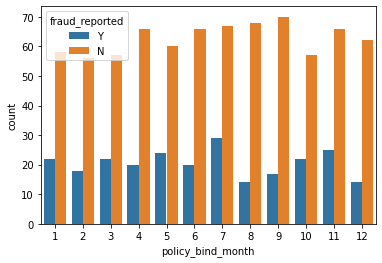

In [101]:
sn.countplot(x="policy_bind_month", data=df, hue = 'fraud_reported')

We can see that the most fraud reported in the month of August and November

<AxesSubplot:xlabel='policy_bind_year', ylabel='Density'>

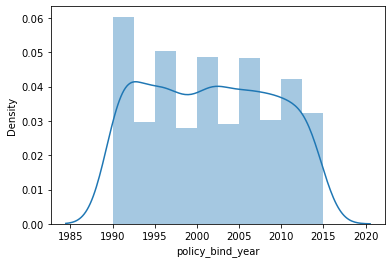

In [102]:
sn.distplot(df['policy_bind_year'])

<AxesSubplot:xlabel='policy_bind_year', ylabel='count'>

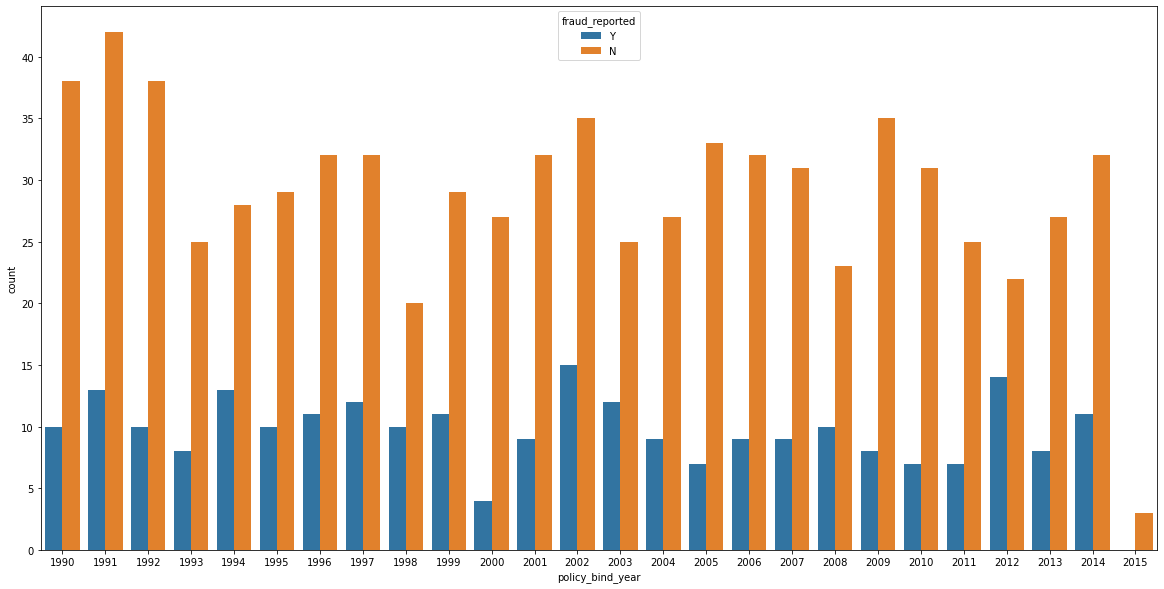

In [103]:
plt.figure(figsize=(20,10))
sn.countplot(x="policy_bind_year", data=df, hue = 'fraud_reported')

The fraud reported cases were maximum in the year 2002 and 2012 and least in the year 2000 and 2015

Encoding Target variable

In [104]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['fraud_reported'] = labelencoder.fit_transform(df['fraud_reported'])

In [105]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

In [108]:
columns = ['policy_state','policy_csl','policy_deductable','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','insured_occupation','insured_relationship','incident_date','authorities_contacted','incident_state','incident_city','auto_make','auto_model','insured_hobbies']

In [109]:
le=LabelEncoder()
for i in columns:
    df[i] = le.fit_transform(df[i])
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int32
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries          

We have encoded all the features. We will now attend to the class imbalance problem and upsample the minority.

In [111]:
no_fraud = df[df.fraud_reported==0]
yes_fraud = df[df.fraud_reported==1]

In [112]:
from sklearn.utils import resample
#upsampling minority
yes_fraud_upsampled = resample(yes_fraud,
                         replace = True,
                         n_samples = len(no_fraud),
                         random_state =27)

In [113]:
df_upsampled = pd.concat([no_fraud,yes_fraud_upsampled])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

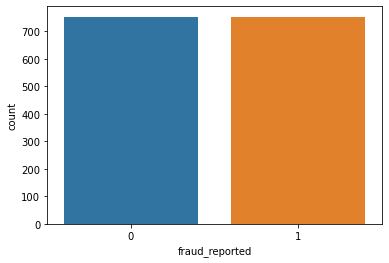

In [114]:
sn.countplot(df_upsampled['fraud_reported'])

<AxesSubplot:>

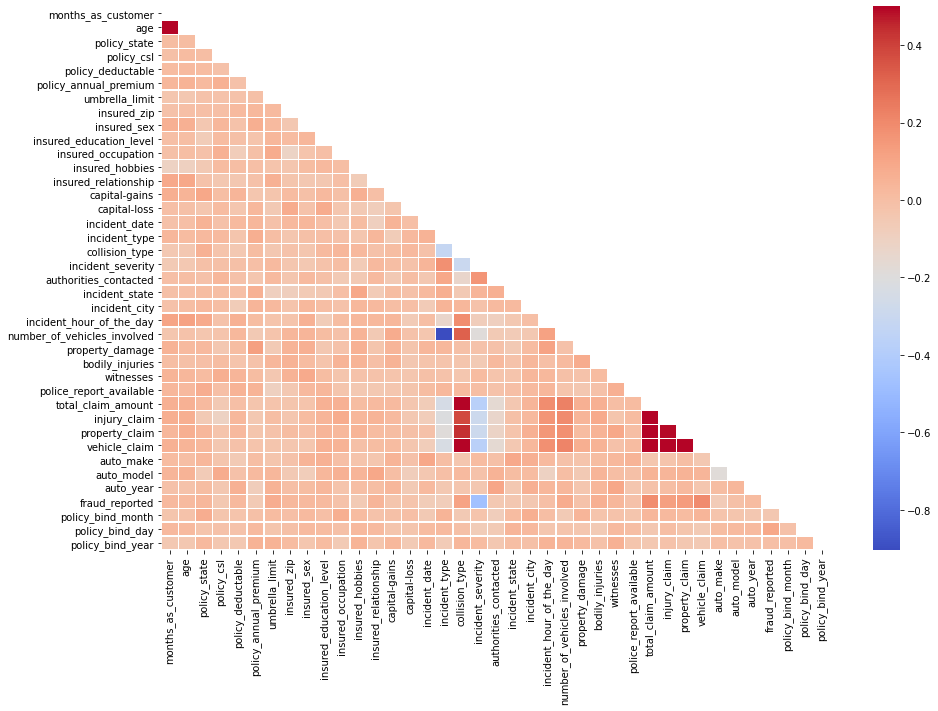

In [115]:
corr = df_upsampled.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

We can see that the fraud reported is negatively correlated to incident_severity and high positively correlated to injury claim,vehicle claim and collision type

<b>Building the model<b>

In [116]:
y = df_upsampled['fraud_reported']
x = df_upsampled.drop(['fraud_reported'],axis = 1)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.61374962, -1.07246782,  1.1787986 , ..., -0.14427077,
        -0.79238129, -0.21527022],
       [ 0.19215007,  0.52741649, -1.25307906, ..., -0.14427077,
        -1.13081754,  1.68936989],
       [-0.58802942, -0.53917305, -0.03714023, ..., -0.73228639,
        -1.13081754, -0.21527022],
       ...,
       [-0.4165614 , -0.85914991, -0.03714023, ..., -1.32030202,
        -0.90519338, -1.57572745],
       [ 0.42363189,  0.42075753, -0.03714023, ..., -0.14427077,
        -1.24362963,  0.73704983],
       [ 1.02376996,  0.84739335, -0.03714023, ..., -0.43827858,
        -1.58206588,  0.60100411]])

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [119]:
from sklearn.tree import DecisionTreeClassifier

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.9310344827586207 on random state  90


In [120]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.25, random_state=maxrs)

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [122]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       181
           1       0.91      0.97      0.94       196

    accuracy                           0.93       377
   macro avg       0.94      0.93      0.93       377
weighted avg       0.94      0.93      0.93       377



In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[162,  19],
       [  6, 190]], dtype=int64)

In [124]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       181
           1       0.85      0.92      0.88       196

    accuracy                           0.87       377
   macro avg       0.88      0.87      0.87       377
weighted avg       0.87      0.87      0.87       377



In [125]:
confusion_matrix(y_test,y_pred)

array([[149,  32],
       [ 16, 180]], dtype=int64)

In [126]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.65      0.72       181
           1       0.73      0.87      0.79       196

    accuracy                           0.76       377
   macro avg       0.78      0.76      0.76       377
weighted avg       0.77      0.76      0.76       377



In [127]:
confusion_matrix(y_test,y_pred)

array([[117,  64],
       [ 25, 171]], dtype=int64)

In [128]:
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       181
           1       0.72      0.75      0.73       196

    accuracy                           0.72       377
   macro avg       0.72      0.71      0.72       377
weighted avg       0.72      0.72      0.72       377



In [129]:
confusion_matrix(y_test,y_pred)

array([[123,  58],
       [ 49, 147]], dtype=int64)

In [130]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       181
           1       0.86      0.86      0.86       196

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377



In [131]:
confusion_matrix(y_test,y_pred)

array([[154,  27],
       [ 28, 168]], dtype=int64)

In [132]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       181
           1       0.88      0.98      0.93       196

    accuracy                           0.92       377
   macro avg       0.93      0.92      0.92       377
weighted avg       0.93      0.92      0.92       377



In [133]:
confusion_matrix(y_test,y_pred)

array([[156,  25],
       [  4, 192]], dtype=int64)

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
print(cross_val_score(dtc,x_scaled,y,cv=5).mean())

0.8970671712393568


In [136]:
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

0.919660733537216


In [137]:
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

0.7390552463092123


In [138]:
print(cross_val_score(abc,x_scaled,y,cv=5).mean())

0.8432927768365932


In [139]:
print(cross_val_score(knc,x_scaled,y,cv=5).mean())

0.7490352247475304


In [140]:
print(cross_val_score(sv,x_scaled,y,cv=5).mean())

0.8419704736969482


In [141]:
from sklearn import metrics

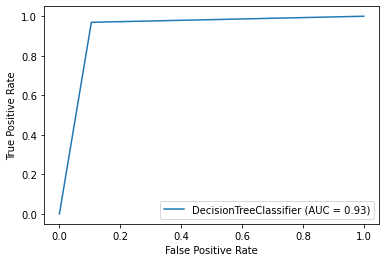

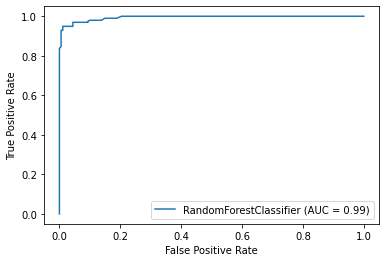

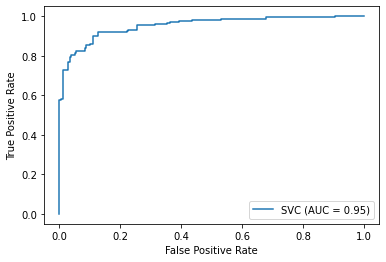

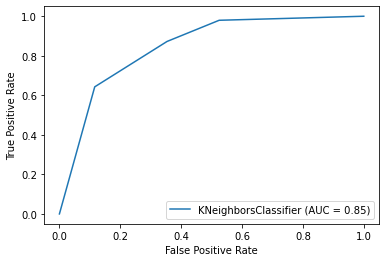

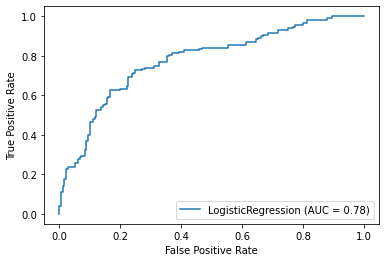

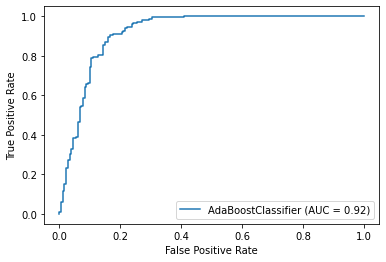

In [142]:
models =[dtc,rfc,sv,knc,lr,abc]
for i in models:
    metrics.plot_roc_curve(i, X_test, y_test)  
    plt.show()

We can see from all the above metrics that Random Forest Classifier is the best model we have.

<b>Hyper parameter Tuning<b>

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
parameter = { 
            'max_depth' : np.arange(2,40),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             }

In [145]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [146]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [147]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}

In [148]:
Final_mod = RandomForestClassifier(criterion='gini',max_depth=11,max_features='auto')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

91.51193633952255


In [149]:
confusion_matrix(y_test,pred)

array([[153,  28],
       [  4, 192]], dtype=int64)

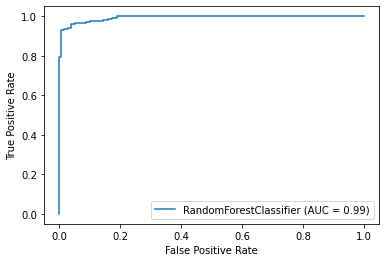

In [150]:
metrics.plot_roc_curve(Final_mod, X_test, y_test)  
plt.show()

<b> Saving the model<b>

In [151]:
import joblib
joblib.dump(Final_mod,"AutomobileInsuranceFraud.pkl")

['AutomobileInsuranceFraud.pkl']